# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Шаг 1. Импорт библиотек, чтение данных, ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

data_games = pd.read_csv('/datasets/games.csv')
display(data_games.info())
display(data_games.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Шаг 2. Подготовка данных.

In [2]:
data_games.columns = data_games.columns.str.lower()

Столбец user_score д.б. типа float, но видимо из-за строчных значений имеем строковый тип столбца.
Год выпуска также должен принадлежать целочисленному типу. 
Также разумно привести стороквые значения столбцов к нижнему регистру.

In [3]:
# Приведем к нижнему регистру строковые значения столбцов:
for column in data_games[['name','platform','genre','rating']]:
    data_games[column] = data_games[column].str.lower()
# Изменим тип данных в столбце year_of_release
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')
# Изучим столбец с оценкой  пользователей
data_games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [4]:
#Заменим tbd на NaN и изменим тип
data_games['user_score'] = data_games['user_score'].replace('tbd', np.NaN)
data_games['user_score'] = data_games['user_score'].astype(float)

In [5]:
#Приступим к обработке пропусков
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

critic_score - оценка критиков - вполне возможно, что игры не оценивались критиками, т.к. тогда это не было заведено. Было бы неправильно заполнить рейтинг игры средним или медианой. Для фильтрации данных, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);
rating - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Здесь то же самое. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "No Rating";
user_score - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.
Столбец year_of_release (год выпуска игры) имеет немного пропусков. Средними/медианами эти пропуски не заполнить. Можно искать неявные дубликаты (игры, выпущенные на разных платформах, но с одним названием), брать максимальныйгод выпуска и заполнять им пропуски, но их такое незначительное коли-во, что мыне будем этого делать. Целых данных достаточно для анализа, поэтому оставляем как есть.

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их "маркерами" для возможности спокойно работать.

In [6]:
# Заполняем пропуски нашими значениями
data_games['critic_score'] = data_games['critic_score'].fillna(-1)
data_games['user_score'] = data_games['user_score'].fillna(-1)
data_games['rating'] = data_games['rating'].fillna('nr')



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хорошее решение!</div>

In [7]:
#Добавим столбец с суммой продаж
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

Шаг 3. Исследовательский анализ данных

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

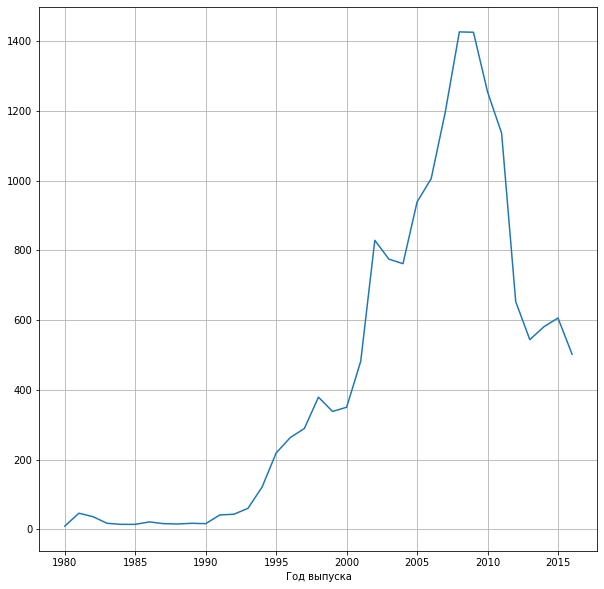

In [8]:
#Составим сводную таблицу и сразу начертим график
year_of_release = pd.pivot_table(data_games, index='year_of_release', values='name', aggfunc='count').plot\
(xlabel='Год выпуска', legend='', grid=True,figsize=(10,10))


Вывод: Данные по всем периодам не важны.

С 1980 годов по 1993 было мало компаний и мало охвата игроков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.
В 2002 году видно, что выпустилось много игр. Наверняка, с 1997 по 2002 появились игровые движки для создания прорывных игр.
Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.
Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии-разработчики как содержат проекты по 10 лет, так как хотят порадовать своих фанатов новым гемплеем, современными технологиями и новой графикой.А быть может, страдают от плохого маркетинга, недостатка разработчиков.

2)Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Количество продаж')

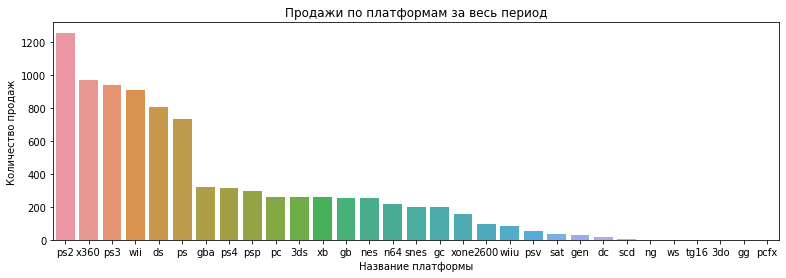

In [9]:
sales_on_platform = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

In [10]:
#Составим список всех платформ
platform_grouped = sales_on_platform.reset_index()
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


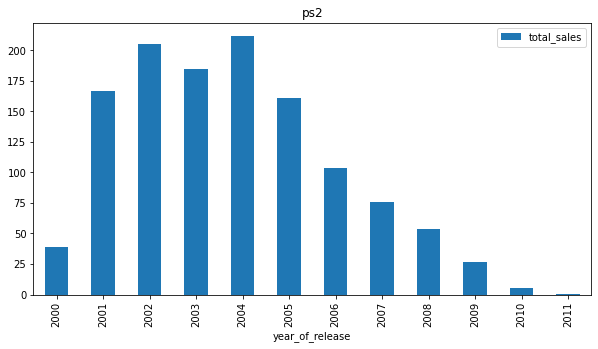

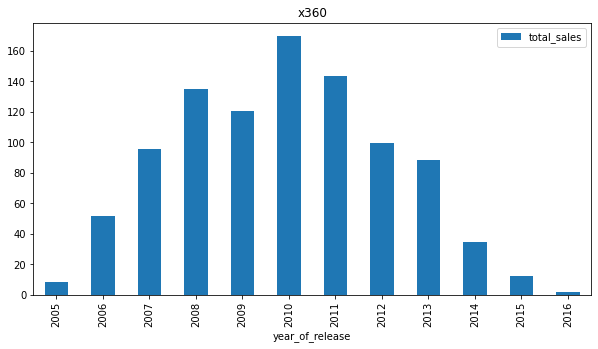

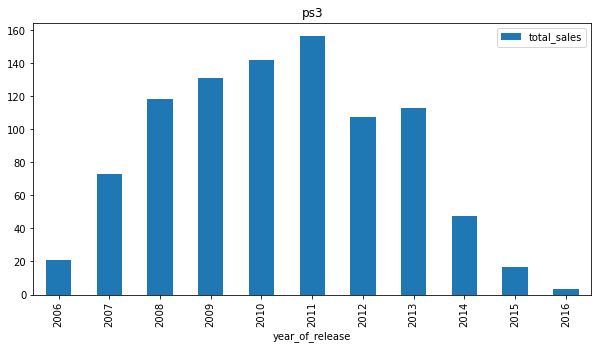

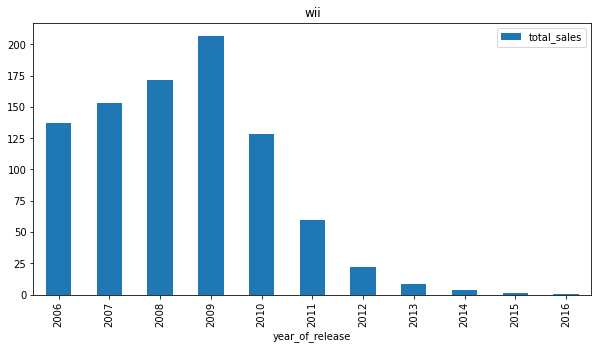

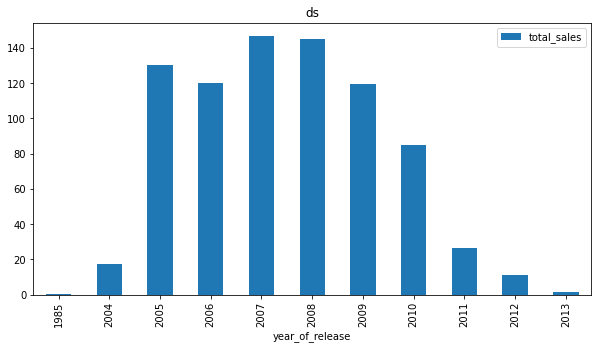

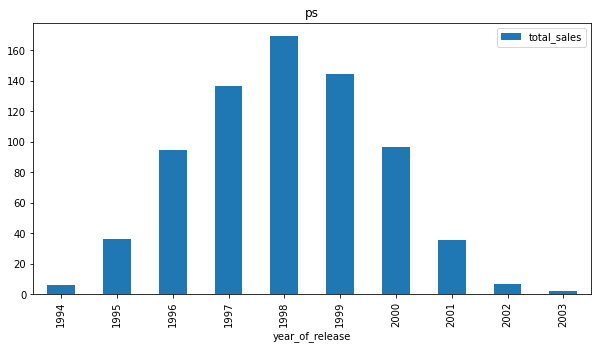

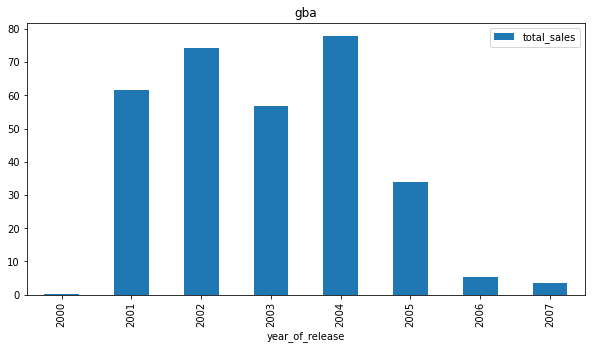

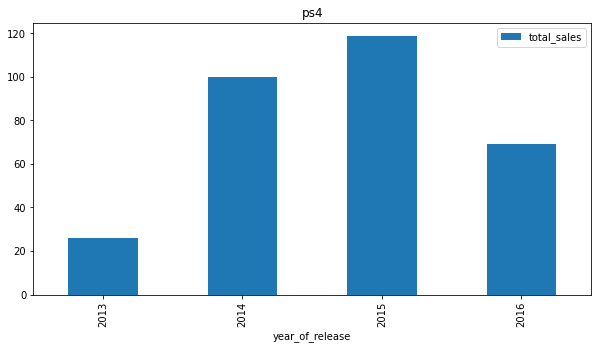

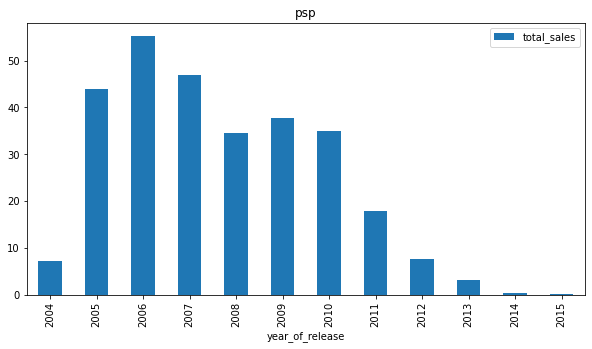

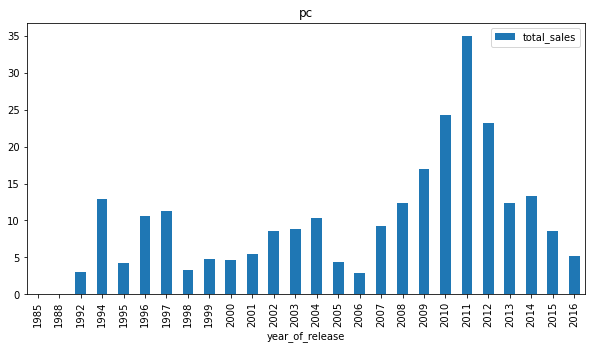

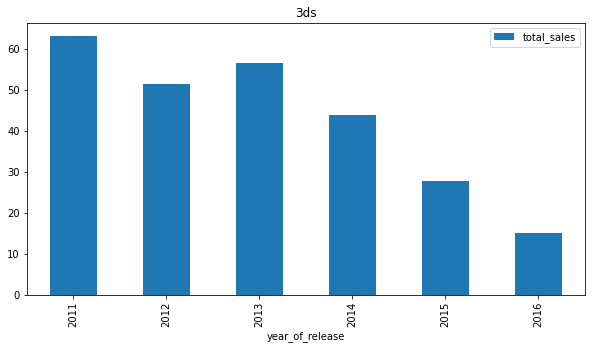

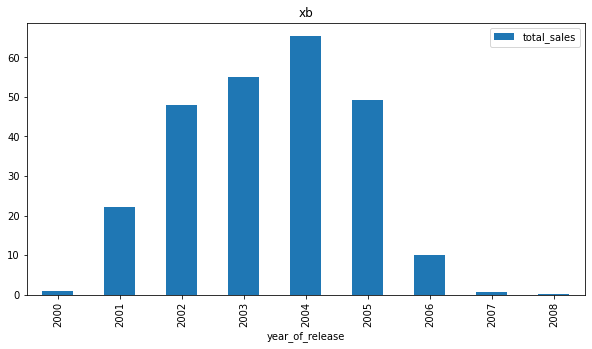

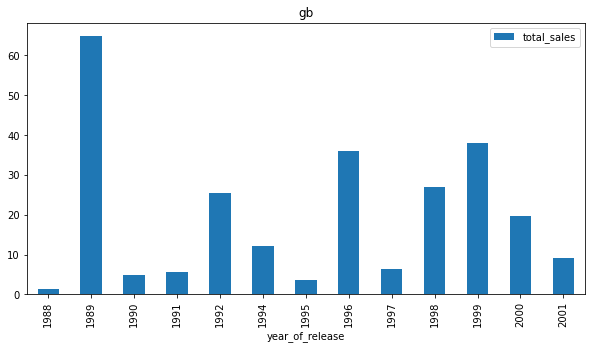

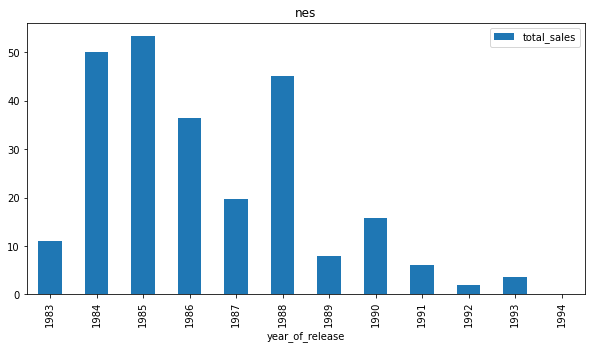

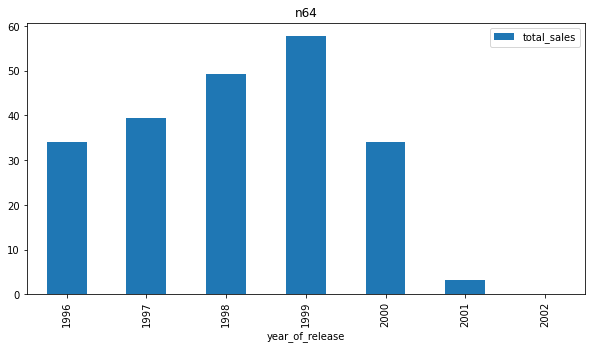

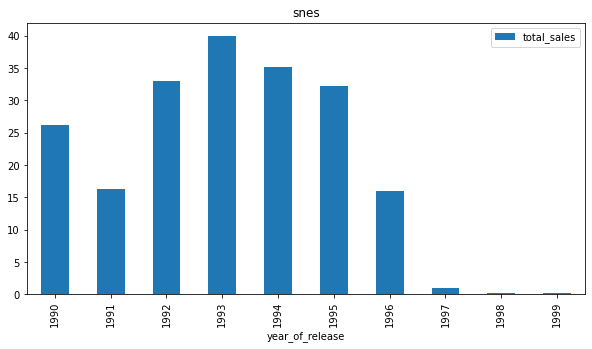

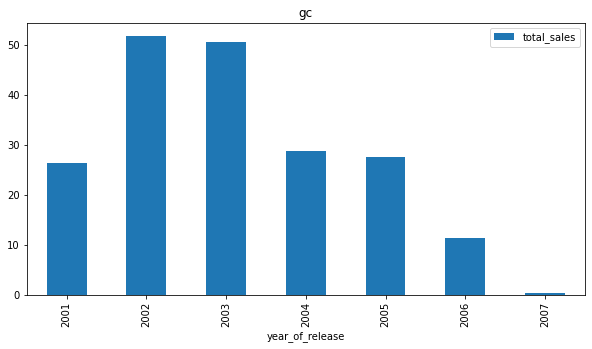

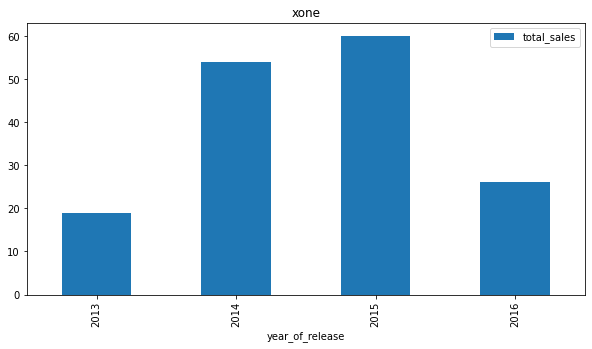

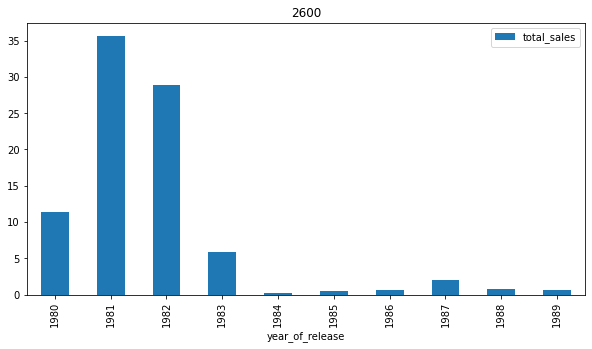

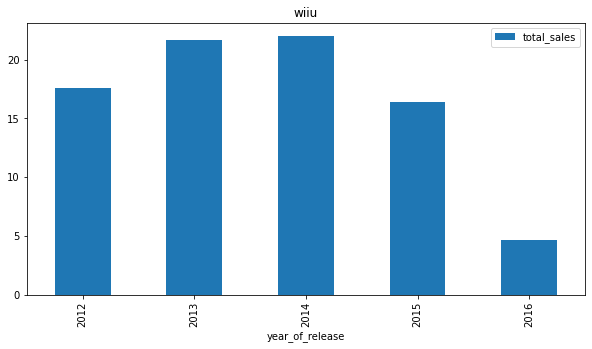

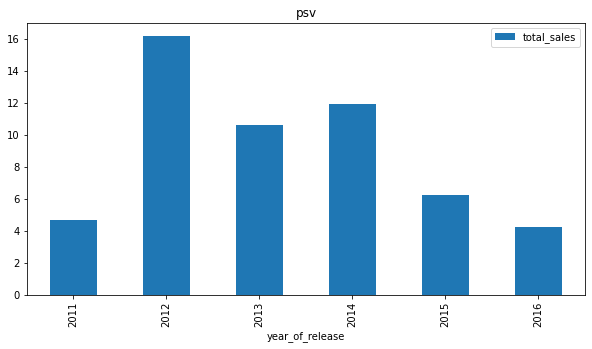

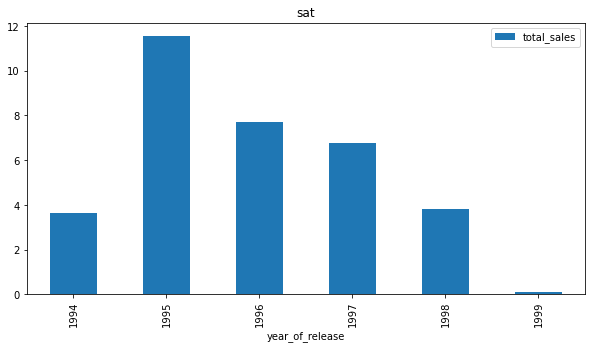

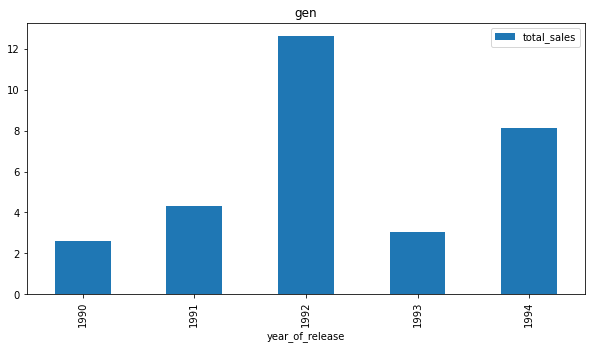

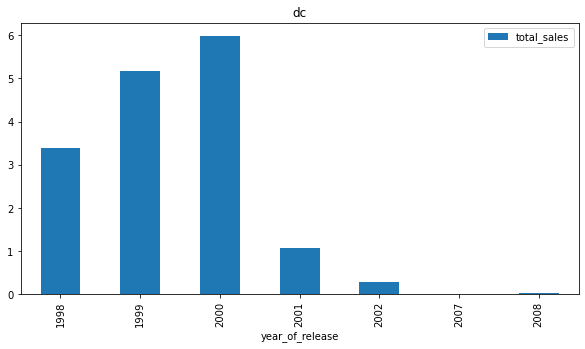

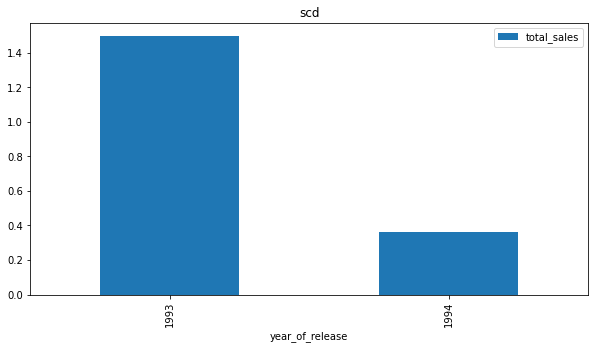

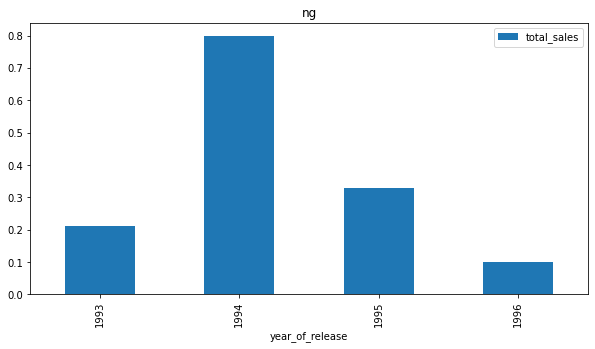

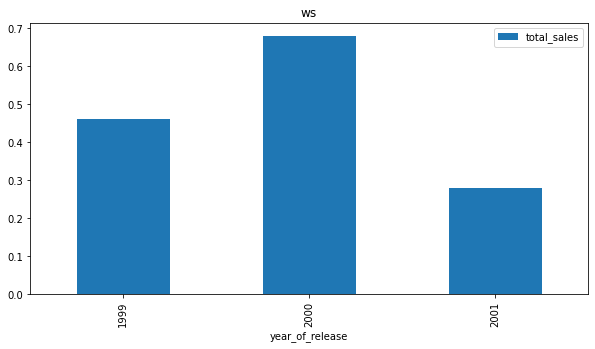

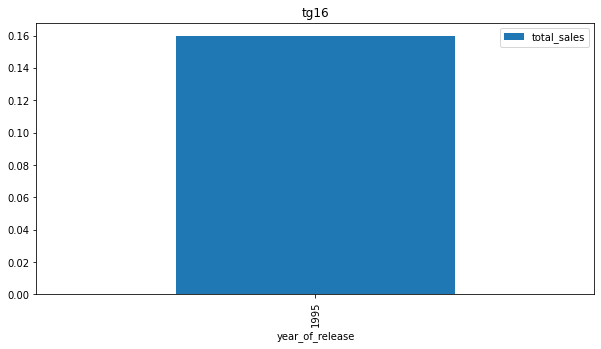

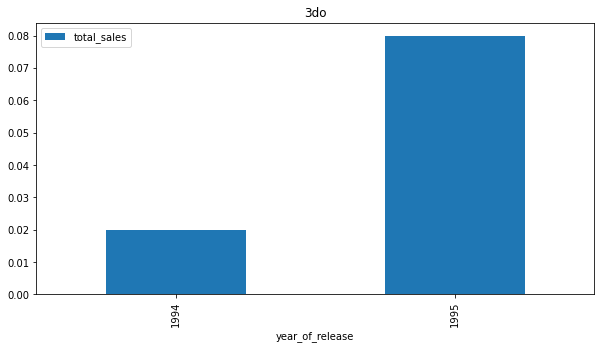

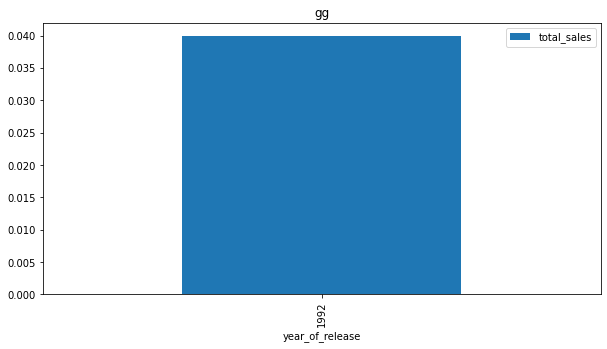

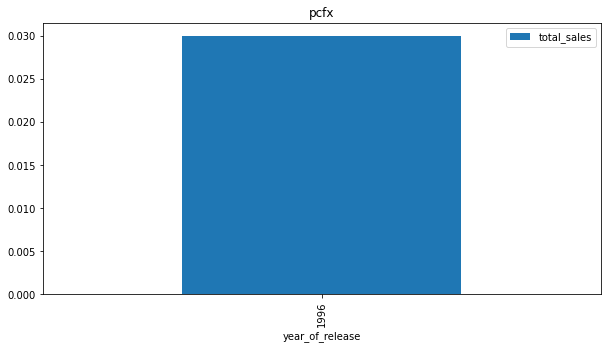

In [11]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms_list:
    data_games[data_games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,5))
    plt.title(platform)

In [12]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index()
# Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет. Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свое могущество на момент 2016 года. Большая часть платформ из нашего списка уже приказала долго жить. Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: PS4, PC, Nintendo 3DS, XBOX One.


3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом по продажам считаю с 2013 по 2016 год.
Появление на рынке новой платформы PS4 говорит от том, что она просуществует 8 лет минимум и топ продаж для этой платформы ещё не наступил.
После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества. Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года.

4)Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [13]:
actual_data_games = data_games.query('year_of_release > 2012')
display(actual_data_games.info())
display(actual_data_games.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,nr,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1.0,-1.0,nr,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


In [14]:
best_sales_platform = pd.pivot_table(actual_data_games, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform

total_sales
platform year_of_release             
3ds      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
ds       2013                    1.54
pc       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
ps3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
ps4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
psp      2013                    3.14
         2014                    0.24
         2015                    0.12
psv      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
wiiu     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
x360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
xone     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [15]:
best_sales_platform = pd.pivot_table(actual_data_games, index='platform', 
                                     values='total_sales', aggfunc = 'sum')
best_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP соотвественно.

6) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

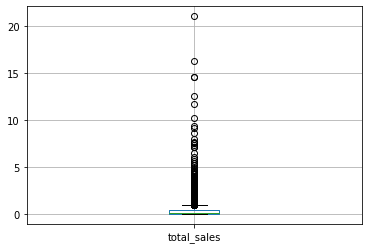

In [16]:
actual_data_games.boxplot(column = 'total_sales')
actual_data_games['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

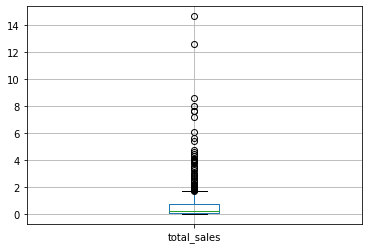

In [17]:
PS4_actual_data_games_sales = actual_data_games.query('platform =="ps4"')
PS4_actual_data_games_sales.boxplot(column = 'total_sales')
PS4_actual_data_games_sales['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

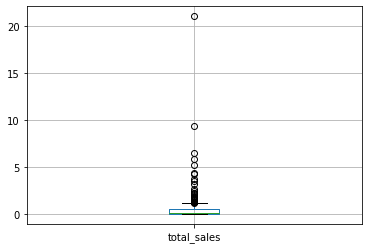

In [18]:
PS3_actual_data_games_sales = actual_data_games.query('platform =="ps3"')
PS3_actual_data_games_sales.boxplot(column = 'total_sales')
PS3_actual_data_games_sales['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

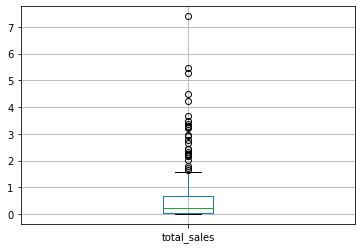

In [19]:
XOne_actual_data_games_sales = actual_data_games.query('platform =="xone"')
XOne_actual_data_games_sales.boxplot(column = 'total_sales')
XOne_actual_data_games_sales['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

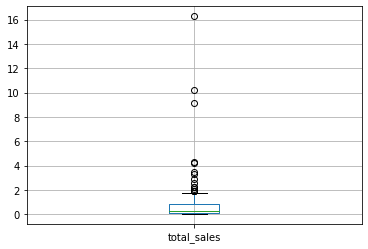

In [20]:
X360_actual_data_games_sales = actual_data_games.query('platform =="x360"')
X360_actual_data_games_sales.boxplot(column = 'total_sales')
X360_actual_data_games_sales['total_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

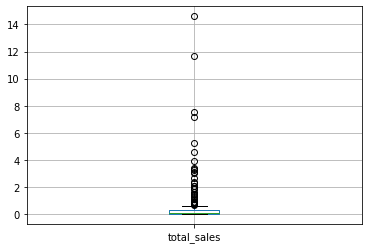

In [21]:
_3DS_actual_data_games_sales = actual_data_games.query('platform =="3ds"')
_3DS_actual_data_games_sales.boxplot(column = 'total_sales')
_3DS_actual_data_games_sales['total_sales'].describe()

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

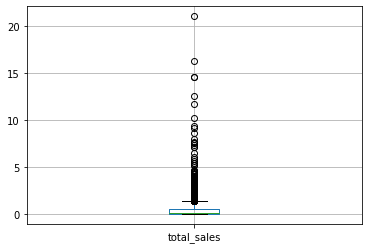

In [22]:
top_platform = ['ps4','ps3','xone','3ds','x360']
total_actual_data_games_sales = actual_data_games.query('platform in @top_platform')
total_actual_data_games_sales.boxplot(column = 'total_sales')
total_actual_data_games_sales['total_sales'].describe()

Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.
Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360.

7) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [23]:
PS4_boofer = PS4_actual_data_games_sales.query('critic_score != -1 & user_score != -1')
PS4_sales_crit_and_user_ratings = PS4_boofer.loc[:,['total_sales', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,total_sales,critic_score,user_score
42,12.62,97.0,8.3
77,8.58,82.0,4.3
92,7.66,83.0,5.7
94,7.60,85.0,5.0
105,7.17,87.0,6.5


In [24]:
PS4_sales_crit_and_user_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

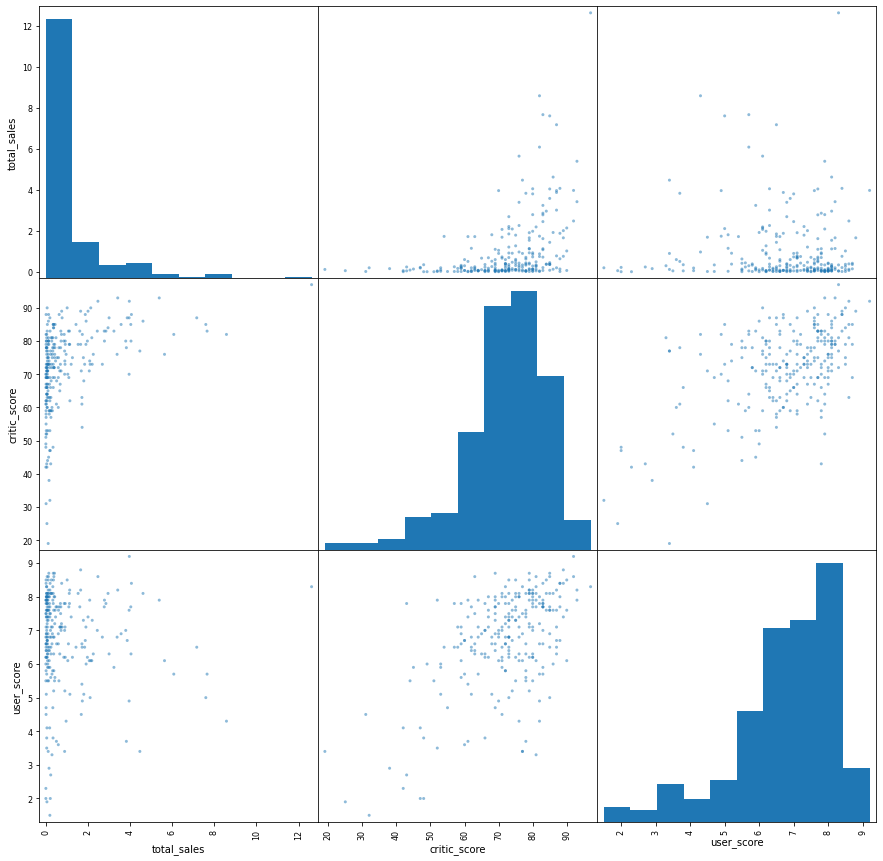

In [25]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(15, 15))

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла.

Важно заметить, что на мнение игроков влияет рейтинг. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.

8)Соотнесите выводы с продажами игр на других платформах.

,total_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
337,3.71,88.0,8.1


,total_sales,critic_score,user_score
total_sales,1.000000,0.333807,0.022691
critic_score,0.333807,1.000000,0.599920
user_score,0.022691,0.599920,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

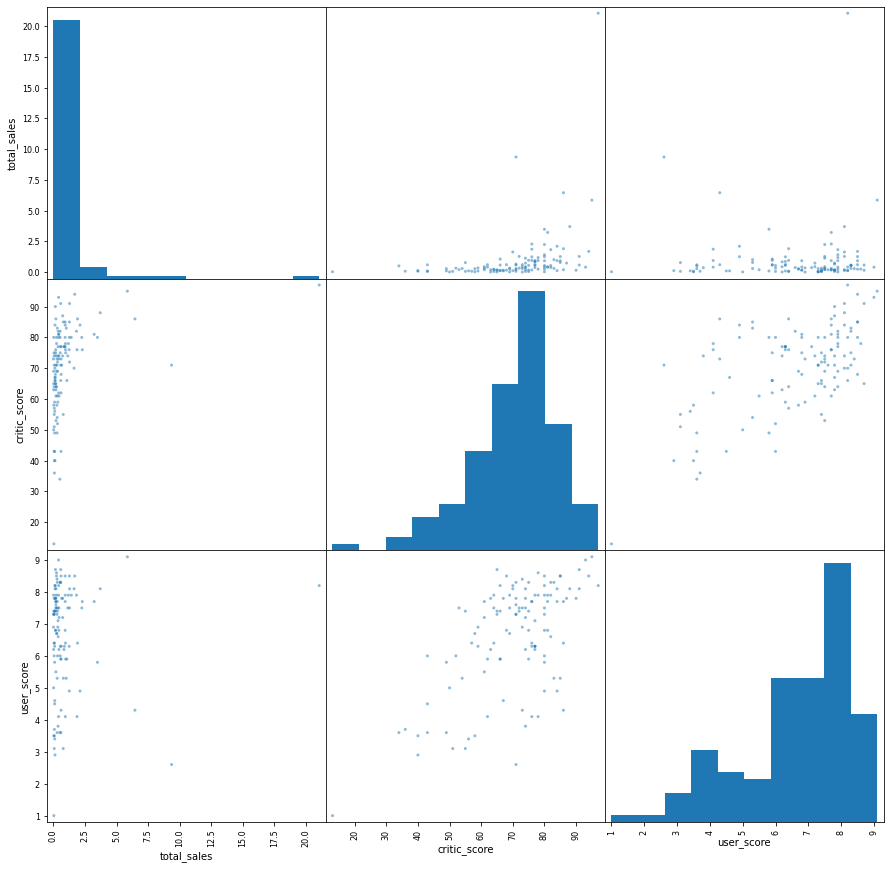

In [26]:
PS3_boofer = PS3_actual_data_games_sales.query('critic_score != -1 & user_score != -1')
PS3_sales_crit_and_user_ratings = PS3_boofer.loc[:,['total_sales', 'critic_score', 'user_score']]
display(PS3_sales_crit_and_user_ratings.head())
display(PS3_sales_crit_and_user_ratings.corr())
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(15, 15))

Для платформы PS3 тенденции похожи на зависимости PS4, но не такие линейные.

,total_sales,critic_score,user_score
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2
373,3.50,72.0,4.1


,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

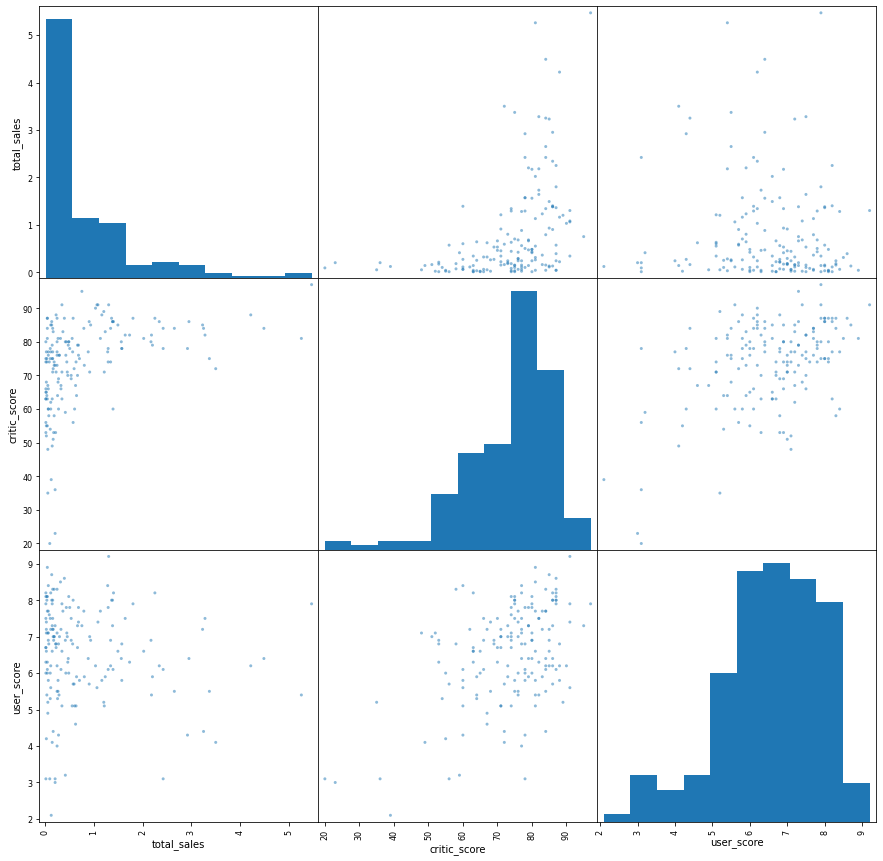

In [27]:
XOne_boofer = XOne_actual_data_games_sales.query('critic_score != -1 & user_score != -1')
XOne_sales_crit_and_user_ratings = XOne_boofer.loc[:,['total_sales', 'critic_score', 'user_score']]
display(XOne_sales_crit_and_user_ratings.head())
display(XOne_sales_crit_and_user_ratings.corr())
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(15, 15))

,total_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
271,4.22,84.0,4.2
380,3.49,79.0,5.6
410,3.31,86.0,7.9


,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.006238
critic_score,0.350345,1.000000,0.520946
user_score,-0.006238,0.520946,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

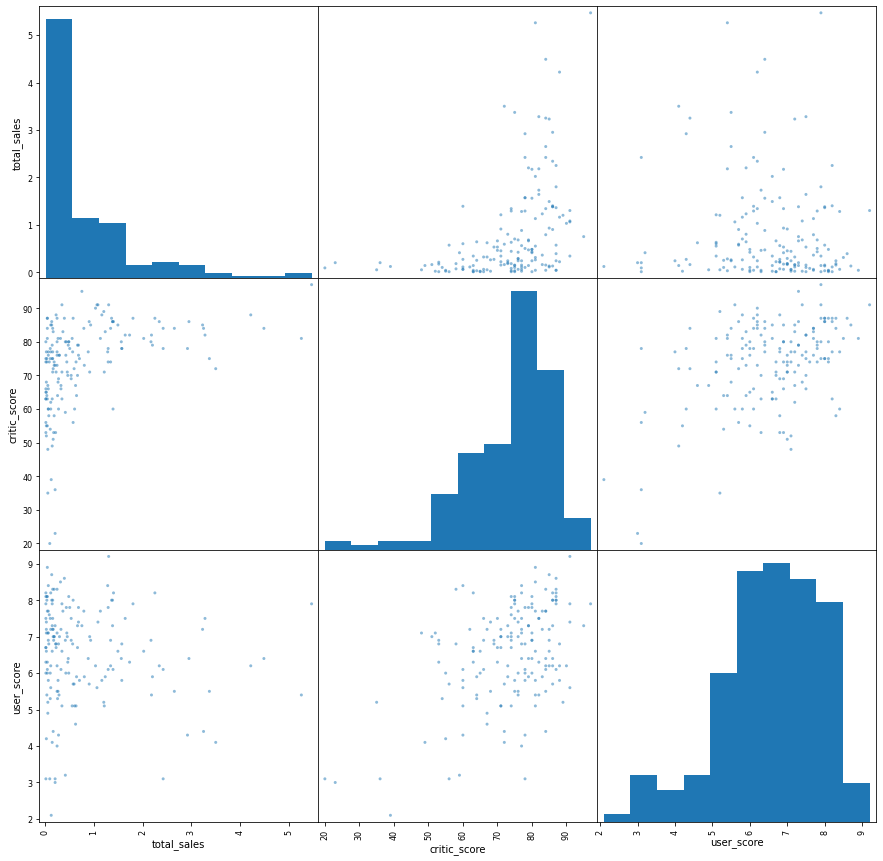

In [28]:
X360_boofer = X360_actual_data_games_sales.query('critic_score != -1 & user_score != -1')
X360_sales_crit_and_user_ratings = X360_boofer.loc[:,['total_sales', 'critic_score', 'user_score']]
display(X360_sales_crit_and_user_ratings.head())
display(X360_sales_crit_and_user_ratings.corr())
pd.plotting.scatter_matrix(XOne_sales_crit_and_user_ratings, figsize=(15, 15))

,total_sales,critic_score,user_score
235,4.59,86.0,8.4
312,3.89,86.0,8.7
448,3.10,91.0,8.9
457,3.05,66.0,6.9
677,2.34,89.0,9.0


,total_sales,critic_score,user_score
total_sales,1.000000,0.339235,0.272990
critic_score,0.339235,1.000000,0.769536
user_score,0.272990,0.769536,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

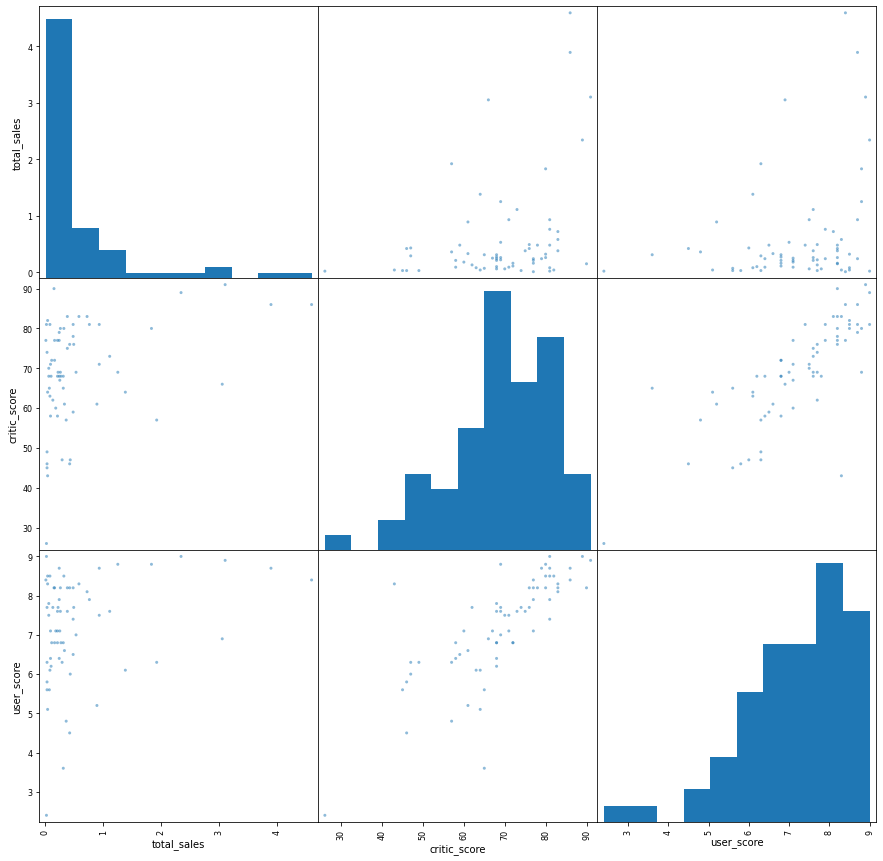

In [29]:
_3DS_boofer = _3DS_actual_data_games_sales.query('critic_score != -1 & user_score != -1')
_3DS_sales_crit_and_user_ratings = _3DS_boofer.loc[:,['total_sales', 'critic_score', 'user_score']]
display(_3DS_sales_crit_and_user_ratings.head())
display(_3DS_sales_crit_and_user_ratings.corr())
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(15, 15))

Платформы PS3, XOne и X360 имеют похожие связи, как и у PS4.

Выделяется 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков. Этосвязано с тем, что игр не очень много, как у других платформ.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

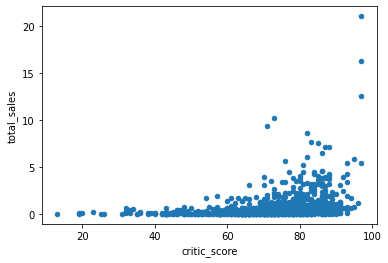

In [51]:
actual_data_games[actual_data_games['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales')

9) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [30]:
genre_pivot_table = pd.pivot_table(actual_data_games, index='genre', values='total_sales', aggfunc=['sum','mean','median','count'])
genre_pivot_table.columns = ['sum', 'mean', 'median','count']
genre_pivot_table.sort_values('sum', ascending=False)

,sum,mean,median,count
genre,,,,
action,321.87,0.420196,0.110,766
shooter,232.98,1.245882,0.450,187
sports,150.65,0.703972,0.240,214
role-playing,145.89,0.499623,0.125,292
misc,62.82,0.405290,0.100,155
platform,42.63,0.576081,0.225,74
racing,39.89,0.469294,0.120,85
fighting,35.31,0.441375,0.125,80
adventure,23.64,0.096490,0.030,245


Самыми прибыльными жанрами можно считать жанры экшен, шутеры, спортивные игры и ролевые игры. Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки, а также жаждой острых ощущений.Популярность шутеров, спортивых игр и ролевых игр обусловлена тем, что в них играют несколько игроков одновременно. Так получаются компанейские соревнования. Ролевые игры затягивают игроков своей сложностью к прохождению игры и долгими сюжетами. В них играют часто и даже перепроходят много раз.
На период 2013-2016 год не пользуются популярностью приключения, симуляторы, стратегии реального времени или пошаговые и головоломки. Эпоха популярности головоломокпросто прошла. Текущее поколение хочет захватывающих действий. Приключение, хоть и появилось позже, оно имеет похожую тенденцию. Симуляторы - это повторение реальной жизни. Этот жанр на любителя. Стратегии редко когда поднимаются в рейтингах по продажам в ввиду еще большей трудности и иногда неторопливости процесса.

Обобщенный вывод: на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.

Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [31]:
na_actual_data_games_sales = actual_data_games.query('na_sales > 0')
na_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   Int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     1309 non-null   float64
 9   user_score       1309 non-null   float64
 10  rating           1309 non-null   object 
 11  total_sales      1309 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 134.2+ KB


In [32]:
eu_actual_data_games_sales = actual_data_games.query('eu_sales > 0')
eu_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   Int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     1422 non-null   float64
 9   user_score       1422 non-null   float64
 10  rating           1422 non-null   object 
 11  total_sales      1422 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 145.8+ KB


In [33]:
jp_actual_data_games_sales = actual_data_games.query('jp_sales > 0')
jp_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   Int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     1187 non-null   float64
 9   user_score       1187 non-null   float64
 10  rating           1187 non-null   object 
 11  total_sales      1187 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 121.7+ KB


,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
wiiu,29.21
pc,11.11
wii,6.56
psv,5.04


<AxesSubplot:xlabel='platform'>

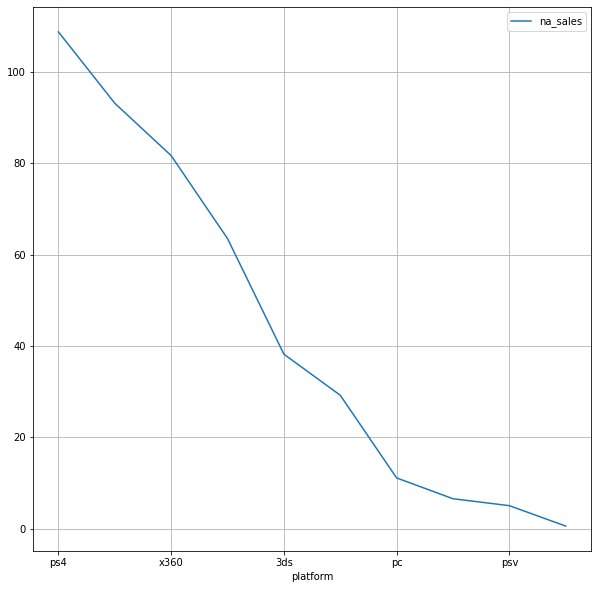

In [34]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_platform_pivot_table)
na_platform_pivot_table.plot(figsize=(10,10),grid=True)

,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
pc,25.36
wiiu,19.85
psv,6.10
wii,5.93


<AxesSubplot:xlabel='platform'>

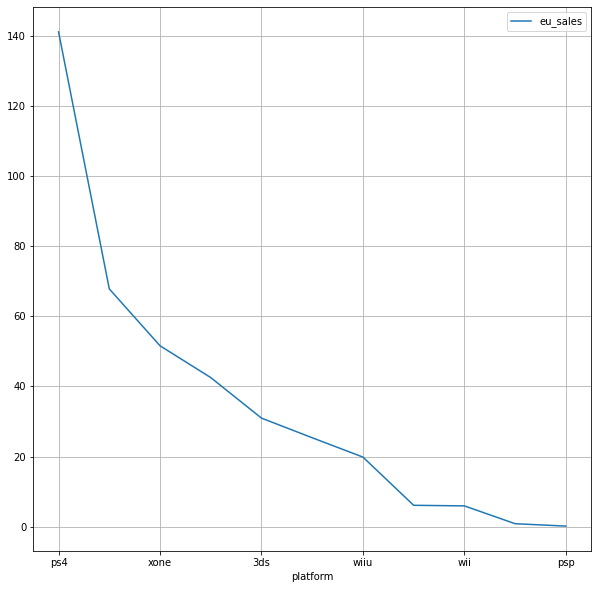

In [35]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_platform_pivot_table)
eu_platform_pivot_table.plot(figsize=(10,10),grid=True)

,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
psp,3.29
x360,0.51
xone,0.34
wii,0.05


<AxesSubplot:xlabel='platform'>

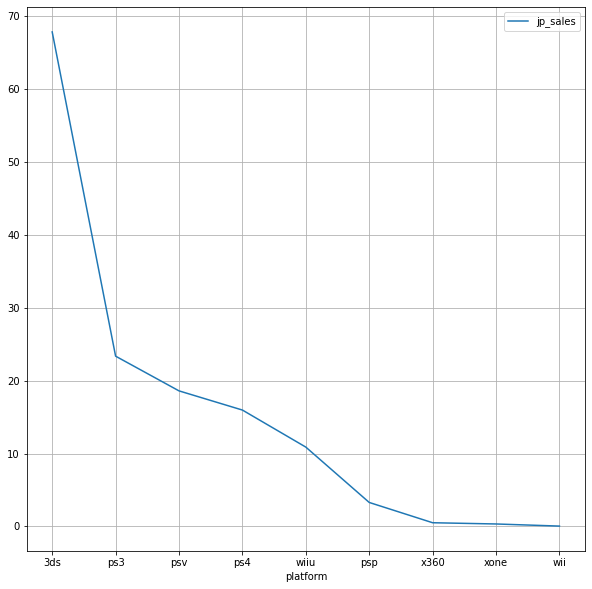

In [36]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_platform_pivot_table)
jp_platform_pivot_table.plot(figsize=(10,10),grid=True)

Рейтинг платформ:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU
Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.
Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. 
На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
platform,18.14
fighting,15.55
racing,12.96
adventure,7.14


<AxesSubplot:xlabel='genre'>

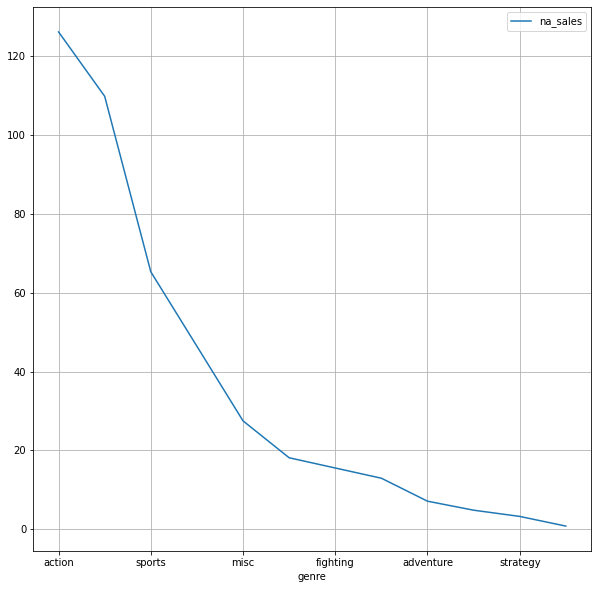

In [37]:
na_genre_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_genre_pivot_table)
na_genre_pivot_table.plot(figsize=(10,10),grid=True)

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
misc,20.04
platform,15.58
simulation,10.92
fighting,8.55


<AxesSubplot:xlabel='genre'>

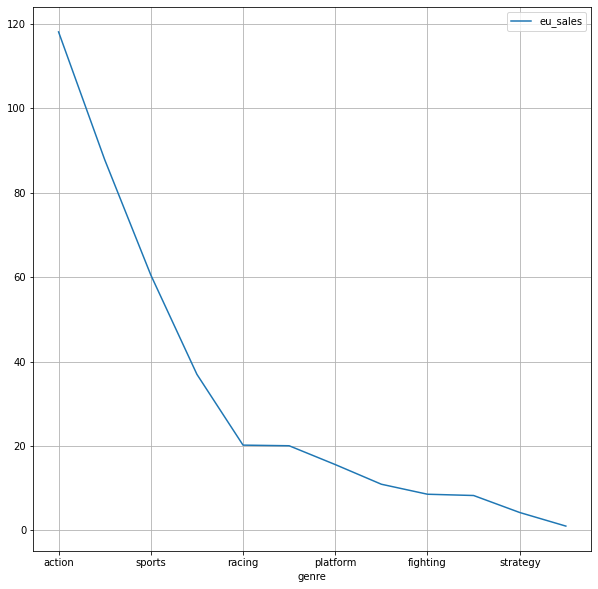

In [38]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre_pivot_table)
eu_genre_pivot_table.plot(figsize=(10,10),grid=True)

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61
adventure,5.82
sports,5.41
platform,4.79
simulation,4.52


<AxesSubplot:xlabel='genre'>

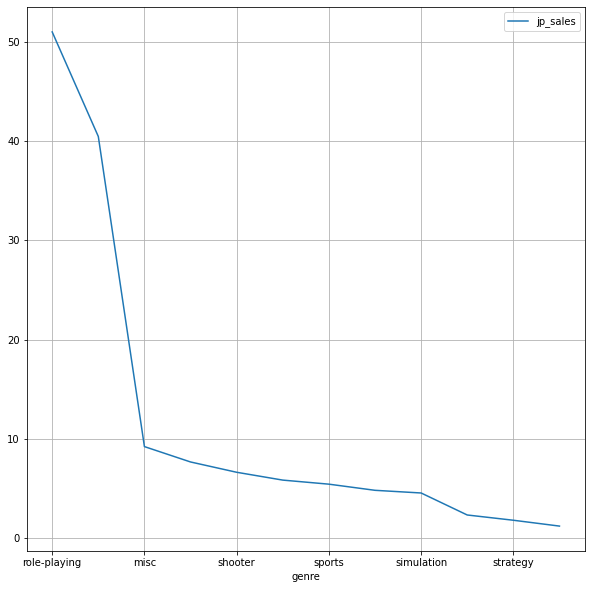

In [39]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_genre_pivot_table)
jp_genre_pivot_table.plot(figsize=(10,10),grid=True)

Рейтинг жанров:
Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter
Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

,na_sales
rating,
m,165.21
nr,89.42
e,79.05
e10+,54.24
t,49.79


<AxesSubplot:xlabel='rating'>

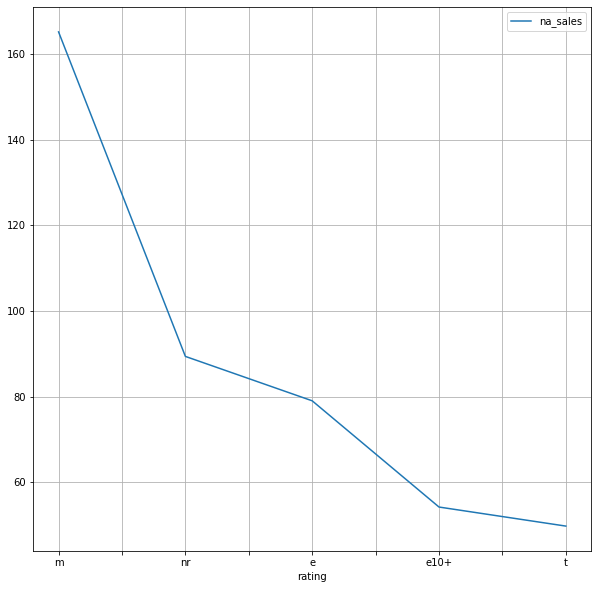

In [40]:
na_rating_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_rating_pivot_table)
na_rating_pivot_table.plot(figsize=(10,10),grid=True)

,eu_sales
rating,
m,145.32
e,83.36
nr,78.91
e10+,42.69
t,41.95


<AxesSubplot:xlabel='rating'>

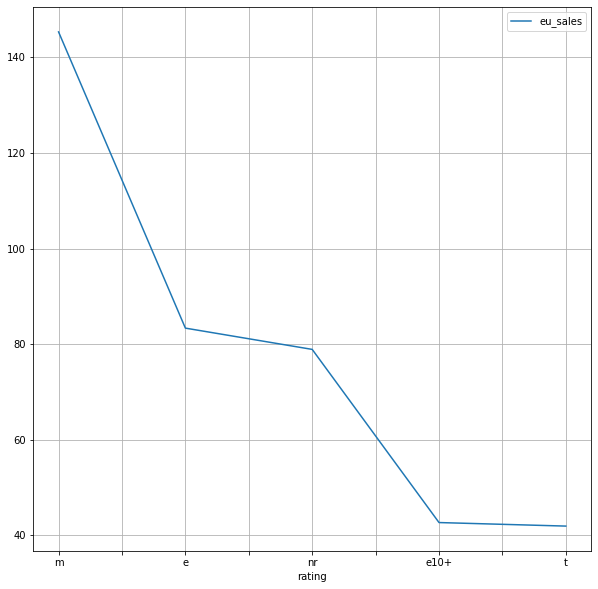

In [41]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_rating_pivot_table)
eu_rating_pivot_table.plot(figsize=(10,10),grid=True)

,jp_sales
rating,
nr,85.05
t,20.59
e,15.14
m,14.11
e10+,5.89


<AxesSubplot:xlabel='rating'>

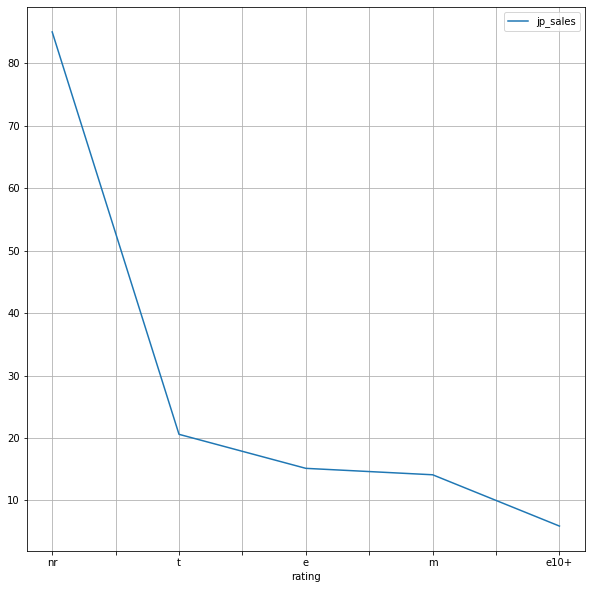

In [42]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_rating_pivot_table)
jp_rating_pivot_table.plot(figsize=(10,10),grid=True)

Рейтинг возраста влияет по каждому региону.В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей. В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят быть любимы у подростков.

Портрет игрока: 
Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

Шаг 5. Проверьте гипотезы.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [43]:
xone_hyp = data_games[(data_games['platform']=='xone') & (data_games['year_of_release']>2012)]['user_score']
pc_hyp = data_games[(data_games['platform']=='pc') & (data_games['year_of_release']>2012)]['user_score']

In [44]:
display(xone_hyp.mean())
display(pc_hyp.mean())

4.542105263157895

4.961904761904762

In [45]:
display(np.var(data_games[data_games['platform']=='xone']['user_score']))
display(np.var(data_games[data_games['platform']=='pc']['user_score']))

12.36705305774558

12.611255022789654

In [46]:
alpha = .01

results = st.ttest_ind(xone_hyp, pc_hyp, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19564149183065668
Не получилось отвергнуть нулевую гипотезу


Значение p-value равно чуть меньше 20%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 20%, чтобы можно было получить различность рейтингов двух платформ.

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [47]:
genre_action_hyp = data_games[(data_games['genre']=='action') & (data_games['year_of_release']>2012)]['user_score']
genre_sports_hyp = data_games[(data_games['genre']=='sports') & (data_games['year_of_release']>2012)]['user_score']

In [48]:
display(genre_action_hyp.mean())
display(genre_sports_hyp.mean())

2.980156657963446

3.6640186915887845

In [49]:
display(np.var(data_games[data_games['genre']=='action']['user_score']))
display(np.var(data_games[data_games['genre']=='sports']['user_score']))

17.198931599296255

17.00584700016542

In [50]:
alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008445505365573197
Отвергаем нулевую гипотезу


Отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

# Итоговый вывод:
    
## Было сделано:
-Просмотрена таблица, выявлены аномалии и пропущенные значения.
-Проведена предобработка таблицы: замена столбцов, заполнение пропусков.
-Проведен анализ по данным и подготовлены актуальные данные.
-Составлены портреты пользователей для купных регионов продаж.
Выполнены проверки гипотез.
Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана, и какого она жанра.

По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
Жанр - это то, что выбирает игрок. Каждый человек уникален, и далеко не каждый игрок будет смешивать стратегии и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.
Сводный анализ для компании на 2017 год.

Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго будет актуален.